# **Laptop Price Prediction for SmartTech Co.**

# **Project Overview:**
SmartTech Co. has partnered with our data science team to develop a robust machine learning model that predicts laptop prices accurately. As the market for laptops continues to expand with a myriad of brands and specifications, having a precise pricing model becomes crucial for both consumers and manufacturers.

# **Client's Objectives:**

**Accurate Pricing:** Develop a model that can accurately predict laptop prices based on various features, helping our clients stay competitive in the market.

**Market Positioning:** Understand how different features contribute to pricing, enabling SmartTech Co. to strategically position its laptops in the market.

**Brand Influence:** Assess the impact of brand reputation on pricing, providing insights into brand perception and market demand.

In [79]:
#import all library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [80]:
#load the dataset
data=pd.read_csv("/content/laptop.csv")

**Data Exploration and Understanding**

In [81]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [14]:
data.describe()

,Unnamed: 0.1,Unnamed: 0,Price
count,1303.00000,1273.000000,1273.000000
mean,651.00000,652.674784,59955.814073
std,376.28801,376.493027,37332.251005
min,0.00000,0.000000,9270.720000
25%,325.50000,327.000000,31914.720000
50%,651.00000,652.000000,52161.120000
75%,976.50000,980.000000,79333.387200
max,1302.00000,1302.000000,324954.720000


**Data Cleaning:**

Handle missing values

Remove Unwanted Columns

In [82]:
data.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,30
Company,30
TypeName,30
Inches,30
ScreenResolution,30
Cpu,30
Ram,30
Memory,30
Gpu,30


In [83]:
data.duplicated().sum()

0

In [84]:
data.dropna(inplace=True)
data.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0


In [85]:
data.drop(columns=['Unnamed: 0.1','Unnamed: 0'],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 119.3+ KB


**EDA of Laptop Price Prediction Dataset**

**Ram,Weight and Inches Column**

In [86]:
# Converting datatype Ram and Weight Column into numerical column
data["Ram"]=data["Ram"].str.replace("GB","")
data["Weight"]=data["Weight"].str.replace("kg","")
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [87]:
# Find rows where the 'Weight' column contains '?'
rows_with_question_mark = data[data["Weight"] == '?']
# Display the rows
print(rows_with_question_mark)

data["Weight"]=data["Weight"].replace("?","1.6")
data["Ram"]=data["Ram"].astype("int32")
data["Weight"]=data["Weight"].astype("float64")

    Company   TypeName Inches   ScreenResolution                         Cpu  \
208    Dell  Ultrabook   13.3  Full HD 1920x1080  Intel Core i7 8550U 1.8GHz   

    Ram     Memory                     Gpu       OpSys Weight     Price  
208   8  256GB SSD  Intel UHD Graphics 620  Windows 10      ?  77202.72  


In [88]:
# Inches Column
# Find rows where the 'Weight' column contains '?'
rows_with_question_mark = data[data["Inches"] == '?']

# Display the rows
print(rows_with_question_mark)

    Company     TypeName Inches   ScreenResolution  \
476    Dell  Workstation      ?  Full HD 1920x1080   

                             Cpu  Ram     Memory                  Gpu  \
476  Intel Core i7 7700HQ 2.8GHz    8  256GB SSD  Nvidia Quadro M1200   

          OpSys  Weight      Price  
476  Windows 10    1.78  128298.24  


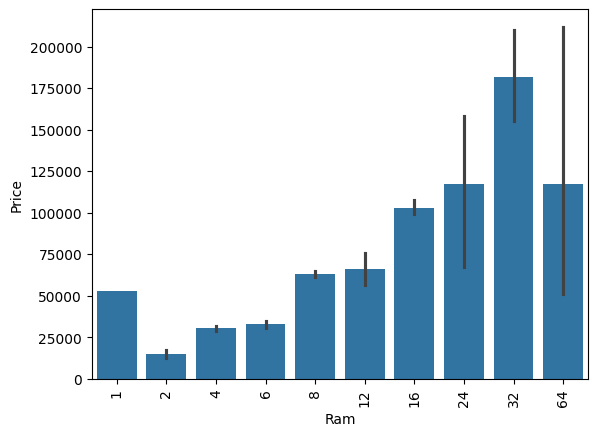

In [89]:
# Ram and price compare using bar plot
sns.barplot(x="Ram",y="Price",data=data)
plt.xticks(rotation='vertical')
plt.show()

In [90]:
data["Inches"]=data["Inches"].replace("?","15.6")
data["Inches"]=data["Inches"].astype("float64")
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int32  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   float64
 10  Price             1273 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 114.4+ KB


 Does the price vary with laptop size in inches?

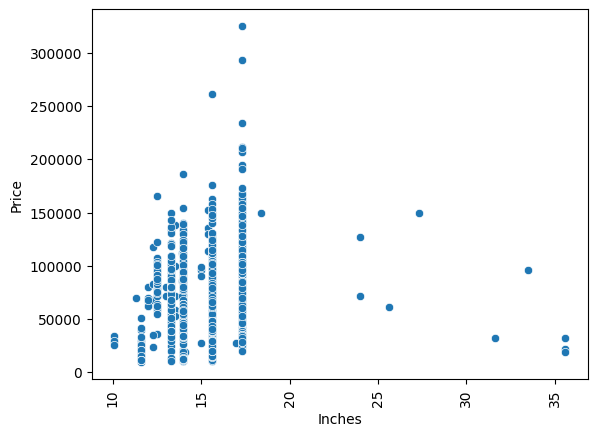

In [91]:
# inches and price compare using scatter plot
sns.scatterplot(x="Inches",y="Price",data=data)
plt.xticks(rotation='vertical')
plt.show()

###  Company Column

In [92]:
# Company Column
data["Company"].value_counts()

,count
Company,
Lenovo,290
Dell,287
HP,266
Asus,156
Acer,103
MSI,53
Toshiba,47
Apple,21
Samsung,9


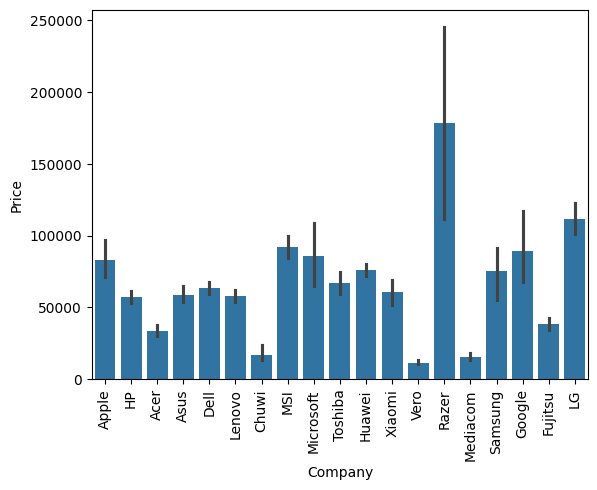

In [93]:
# Company and price compare using bar plot
sns.barplot(x="Company",y="Price",data=data)
plt.xticks(rotation='vertical')
plt.show()

**Types of laptop**

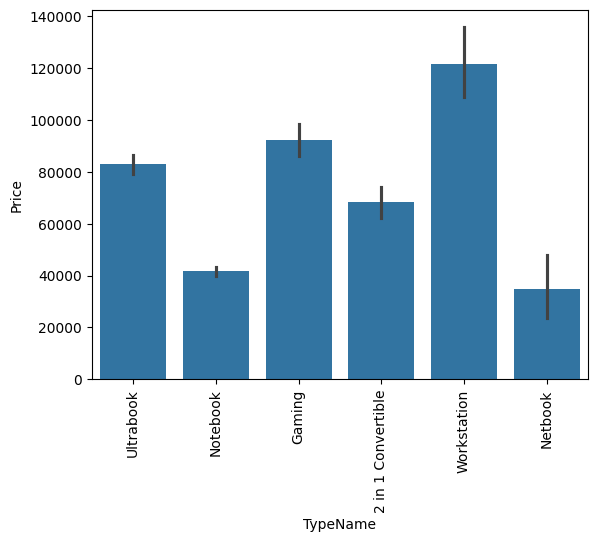

In [94]:
# TypeName Column
# Typename and price compare comparision
sns.barplot(x=data["TypeName"],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

## **Feature Engineering and Preprocessing of Laptop Price Prediction Model**
**ScreenResolution Column**

In [95]:
# ScreenResolution Column
data["ScreenResolution"].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,495
1366x768,274
IPS Panel Full HD 1920x1080,226
IPS Panel Full HD / Touchscreen 1920x1080,52
Full HD / Touchscreen 1920x1080,45
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,14
IPS Panel 4K Ultra HD 3840x2160,12


In [96]:
#Extract X-axis and Y-axis screen resolution dimensions
data['Height']=data["ScreenResolution"].str.split("x",n=1,expand=True)[0]
data['Width']=data["ScreenResolution"].str.split("x",expand=True)[1]
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Height,Width
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,IPS Panel Retina Display 2560,1600


In [97]:
#split Height column by extracting no's
data["Height"]=data["Height"].str.extract("(\d+)").astype("int32")
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Height,Width
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560,1600


In [98]:
# converting data type
data["Height"]=data["Height"].astype("int32")
data["Width"]=data["Width"].astype("int32")
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int32  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   float64
 10  Price             1273 non-null   float64
 11  Height            1273 non-null   int32  
 12  Width             1273 non-null   int32  
dtypes: float64(3), int32(3), object(7)
memory usage: 124.3+ KB


In [99]:
# Fetching touchscreen and Ips data from screenresolution column
data['Touchscreen'] = data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
data['Ips'] = data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Height,Width,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560,1600,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440,900,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920,1080,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880,1800,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560,1600,0,1


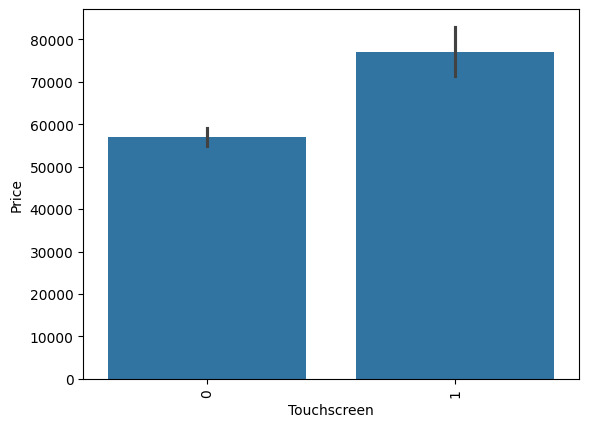

In [100]:
# Touchscreen and price compare comparision
sns.barplot(x=data["Touchscreen"],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

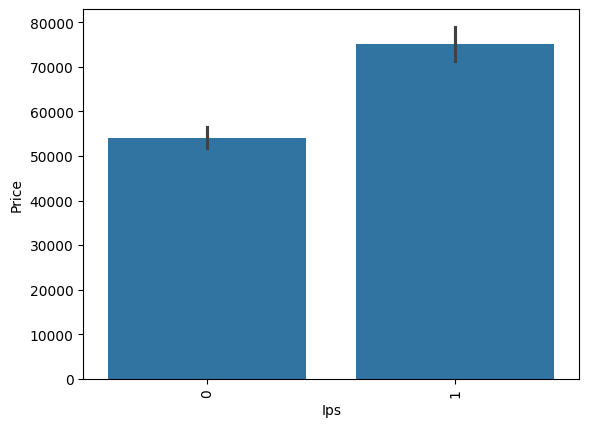

In [101]:
# Ips and price compare comparision
sns.barplot(x=data["Ips"],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [102]:
# Calculating Price Per Inch column from height,width and inch column
data["PPI_pixal_pre_inch"]=((data["Width"]**2)+(data["Height"]**2))**0.5/data["Inches"]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             1273 non-null   object 
 1   TypeName            1273 non-null   object 
 2   Inches              1273 non-null   float64
 3   ScreenResolution    1273 non-null   object 
 4   Cpu                 1273 non-null   object 
 5   Ram                 1273 non-null   int32  
 6   Memory              1273 non-null   object 
 7   Gpu                 1273 non-null   object 
 8   OpSys               1273 non-null   object 
 9   Weight              1273 non-null   float64
 10  Price               1273 non-null   float64
 11  Height              1273 non-null   int32  
 12  Width               1273 non-null   int32  
 13  Touchscreen         1273 non-null   int64  
 14  Ips                 1273 non-null   int64  
 15  PPI_pixal_pre_inch  1273 non-null   float64
dtypes: float64(

In [103]:
data.drop(columns=['ScreenResolution','Inches','Height','Width'],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             1273 non-null   object 
 1   TypeName            1273 non-null   object 
 2   Cpu                 1273 non-null   object 
 3   Ram                 1273 non-null   int32  
 4   Memory              1273 non-null   object 
 5   Gpu                 1273 non-null   object 
 6   OpSys               1273 non-null   object 
 7   Weight              1273 non-null   float64
 8   Price               1273 non-null   float64
 9   Touchscreen         1273 non-null   int64  
 10  Ips                 1273 non-null   int64  
 11  PPI_pixal_pre_inch  1273 non-null   float64
dtypes: float64(3), int32(1), int64(2), object(6)
memory usage: 124.3+ KB


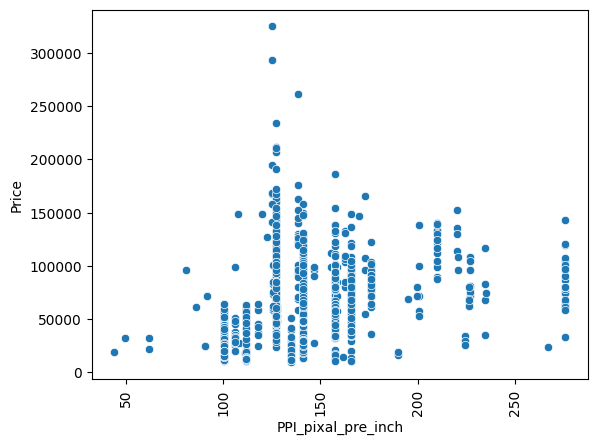

In [104]:
# PPI_pixal_pre_inch and price compare comparision
sns.scatterplot(x=data["PPI_pixal_pre_inch"],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

### **CPU column**

In [105]:
#Cpu Column
data['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,183
Intel Core i7 7700HQ 2.8GHz,142
Intel Core i7 7500U 2.7GHz,128
Intel Core i7 8550U 1.8GHz,72
Intel Core i5 8250U 1.6GHz,68
...,...
AMD A9-Series 9420 2.9GHz,1
Intel Core i7 2.2GHz,1
AMD A6-Series 7310 2GHz,1


In [106]:
data['Cpu_Name']=data['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
data['Cpu_Name']

,Cpu_Name
0,Intel Core i5
1,Intel Core i5
2,Intel Core i5
3,Intel Core i7
4,Intel Core i5
...,...
1298,Intel Core i7
1299,Intel Core i7
1300,Intel Celeron Dual
1301,Intel Core i7


In [107]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'AMD':
            return 'AMD'
        else:
            return 'Other Intel Processor'

data['Cpu_brand'] = data['Cpu_Name'].apply(fetch_processor)
data

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI_pixal_pre_inch,Cpu_Name,Cpu_brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,Intel Core i7
1299,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,Intel Core i7
1300,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Intel Celeron Dual,Other Intel Processor
1301,HP,Notebook,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,Intel Core i7


In [108]:
data.drop(columns=['Cpu','Cpu_Name'],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             1273 non-null   object 
 1   TypeName            1273 non-null   object 
 2   Ram                 1273 non-null   int32  
 3   Memory              1273 non-null   object 
 4   Gpu                 1273 non-null   object 
 5   OpSys               1273 non-null   object 
 6   Weight              1273 non-null   float64
 7   Price               1273 non-null   float64
 8   Touchscreen         1273 non-null   int64  
 9   Ips                 1273 non-null   int64  
 10  PPI_pixal_pre_inch  1273 non-null   float64
 11  Cpu_brand           1273 non-null   object 
dtypes: float64(3), int32(1), int64(2), object(6)
memory usage: 124.3+ KB


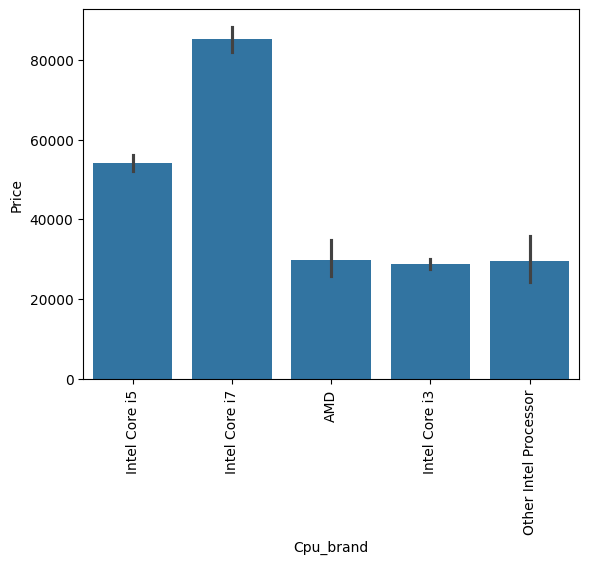

In [109]:
#How does the price vary with processors?
# Cpu_brand and price compare comparision
sns.barplot(x=data["Cpu_brand"],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

## **Memory column**

In [110]:
#Memory Column
data['Memory'].value_counts()

,count
Memory,
256GB SSD,401
1TB HDD,217
500GB HDD,130
512GB SSD,116
128GB SSD + 1TB HDD,92
128GB SSD,74
256GB SSD + 1TB HDD,71
32GB Flash Storage,37
2TB HDD,16


In [111]:
#preprocessing
data['Memory'] = data['Memory'].astype(str).replace('\.0', '', regex=True)
data['Memory'] = data['Memory'].str.replace('GB', '')
data['Memory'] = data['Memory'].str.replace('TB', '000')
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI_pixal_pre_inch,Cpu_brand
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [112]:
new=data['Memory'].str.split('+',expand=True)
data['first'] = new[0]
data['second'] = new[1]
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI_pixal_pre_inch,Cpu_brand,first,second
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,None
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,None
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,None
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,None
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,None


In [113]:
#binary encoding
data['first'] = data['first'].str.strip()
data['layer1HDD'] = data['first'].apply(lambda x: 1 if 'HDD' in x else 0)
data['layer1SSD'] = data['first'].apply(lambda x: 1 if 'SSD' in x else 0)
data['layer1Hybird'] = data['first'].apply(lambda x: 1 if 'Hybird' in x else 0)
data['layer1Flash_storage'] = data['first'].apply(lambda x: 1 if 'Flash Storage' in x else 0)
data['first'] = data['first'].str.replace(r'\D', '',regex=True)
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI_pixal_pre_inch,Cpu_brand,first,second,layer1HDD,layer1SSD,layer1Hybird,layer1Flash_storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,None,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128,None,0,0,0,1
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,None,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,None,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,None,0,1,0,0


In [114]:
data['second'].fillna('0', inplace=True)
data['layer2HDD'] = data['second'].apply(lambda x: 1 if 'HDD' in x else 0)
data['layer2SSD'] = data['second'].apply(lambda x: 1 if 'SSD' in x else 0)
data['layer2Hybird'] = data['second'].apply(lambda x: 1 if 'Hybird' in x else 0)
data['layer2Flash_storage'] = data['second'].apply(lambda x :1 if 'Flash Storage' in x else 0)
data['second'] = data['second'].str.replace(r'\D', '',regex=True)
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,...,first,second,layer1HDD,layer1SSD,layer1Hybird,layer1Flash_storage,layer2HDD,layer2SSD,layer2Hybird,layer2Flash_storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128,0,0,1,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,128,0,0,0,0,1,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,256,0,0,1,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,512,0,0,1,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,256,0,0,1,0,0,0,0,0,0


In [115]:
#convert to numeric
data['first'] = data['first'].replace('','0').astype(int)
data['second'] = data['second'].astype(int)

data['HDD'] = (data['first']*data['layer1HDD']+data['second']*data['layer2HDD'])
data['SSD'] = (data['first']*data['layer1SSD']+data['second']*data['layer2SSD'])
data['Hybird'] = (data['first']*data['layer1Hybird']+data['second']*data['layer2Hybird'])
data['Falsh_storage'] = (data['first']*data['layer1Flash_storage']+data['second']*data['layer2Flash_storage'])
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,...,layer1Hybird,layer1Flash_storage,layer2HDD,layer2SSD,layer2Hybird,layer2Flash_storage,HDD,SSD,Hybird,Falsh_storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,0,0,0,0,0,0,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,0,1,0,0,0,0,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,0,0,0,0,0,0,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,0,0,0,0,0,0,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,0,0,0,0,0,0,0,256,0,0


In [116]:
#Drop the unnessary columns
data.drop(columns=['first', 'second', 'layer1HDD', 'layer1SSD', 'layer1Hybird','layer1Flash_storage', 'layer2HDD', 'layer2SSD', 'layer2Hybird','layer2Flash_storage','Memory'],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             1273 non-null   object 
 1   TypeName            1273 non-null   object 
 2   Ram                 1273 non-null   int32  
 3   Gpu                 1273 non-null   object 
 4   OpSys               1273 non-null   object 
 5   Weight              1273 non-null   float64
 6   Price               1273 non-null   float64
 7   Touchscreen         1273 non-null   int64  
 8   Ips                 1273 non-null   int64  
 9   PPI_pixal_pre_inch  1273 non-null   float64
 10  Cpu_brand           1273 non-null   object 
 11  HDD                 1273 non-null   int64  
 12  SSD                 1273 non-null   int64  
 13  Hybird              1273 non-null   int64  
 14  Falsh_storage       1273 non-null   int64  
dtypes: float64(3), int32(1), int64(6), object(5)
memory usage: 1

### **GPU Column**

In [117]:
# Gpu Column
data["Gpu"].value_counts()

,count
Gpu,
Intel HD Graphics 620,271
Intel HD Graphics 520,181
Intel UHD Graphics 620,66
Nvidia GeForce GTX 1050,64
Nvidia GeForce GTX 1060,48
...,...
AMD Radeon R5 520,1
AMD Radeon R7,1
Intel HD Graphics 540,1


In [118]:
data['Gpu_Brand']=data['Gpu'].apply(lambda x:x.split()[0])
data['Gpu_Brand']

,Gpu_Brand
0,Intel
1,Intel
2,Intel
3,AMD
4,Intel
...,...
1298,Intel
1299,Intel
1300,Intel
1301,AMD


In [119]:
data['Gpu_Brand'].value_counts()

,count
Gpu_Brand,
Intel,703
Nvidia,393
AMD,176
ARM,1


In [120]:
#there is only 1 row of ARM GPU so remove it
data = data[data['Gpu_Brand'] != 'ARM']

In [121]:
data['Gpu_Brand'].value_counts()

,count
Gpu_Brand,
Intel,703
Nvidia,393
AMD,176


In [122]:
data.drop(columns=['Gpu'],inplace=True)

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1272 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             1272 non-null   object 
 1   TypeName            1272 non-null   object 
 2   Ram                 1272 non-null   int32  
 3   OpSys               1272 non-null   object 
 4   Weight              1272 non-null   float64
 5   Price               1272 non-null   float64
 6   Touchscreen         1272 non-null   int64  
 7   Ips                 1272 non-null   int64  
 8   PPI_pixal_pre_inch  1272 non-null   float64
 9   Cpu_brand           1272 non-null   object 
 10  HDD                 1272 non-null   int64  
 11  SSD                 1272 non-null   int64  
 12  Hybird              1272 non-null   int64  
 13  Falsh_storage       1272 non-null   int64  
 14  Gpu_Brand           1272 non-null   object 
dtypes: float64(3), int32(1), int64(6), object(5)
memory usage: 1

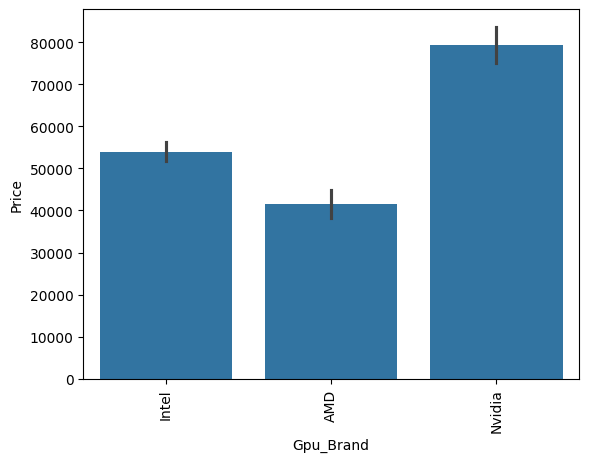

In [124]:
# Gpu_brand and price compare comparision
sns.barplot(x=data["Gpu_Brand"],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

### ** Operating System Column**

In [125]:
# OpSys Column
data['OpSys'].value_counts()

,count
OpSys,
Windows 10,1047
No OS,63
Linux,61
Windows 7,45
Chrome OS,26
macOS,13
Mac OS X,8
Windows 10 S,8
Android,1


In [126]:
#Get which OP sys
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

data['os'] = data['OpSys'].apply(cat_os)
data.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,PPI_pixal_pre_inch,Cpu_brand,HDD,SSD,Hybird,Falsh_storage,Gpu_Brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0,Intel,Mac


In [127]:
data.drop(columns=['OpSys'],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1272 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             1272 non-null   object 
 1   TypeName            1272 non-null   object 
 2   Ram                 1272 non-null   int32  
 3   Weight              1272 non-null   float64
 4   Price               1272 non-null   float64
 5   Touchscreen         1272 non-null   int64  
 6   Ips                 1272 non-null   int64  
 7   PPI_pixal_pre_inch  1272 non-null   float64
 8   Cpu_brand           1272 non-null   object 
 9   HDD                 1272 non-null   int64  
 10  SSD                 1272 non-null   int64  
 11  Hybird              1272 non-null   int64  
 12  Falsh_storage       1272 non-null   int64  
 13  Gpu_Brand           1272 non-null   object 
 14  os                  1272 non-null   object 
dtypes: float64(3), int32(1), int64(6), object(5)
memory usage: 1

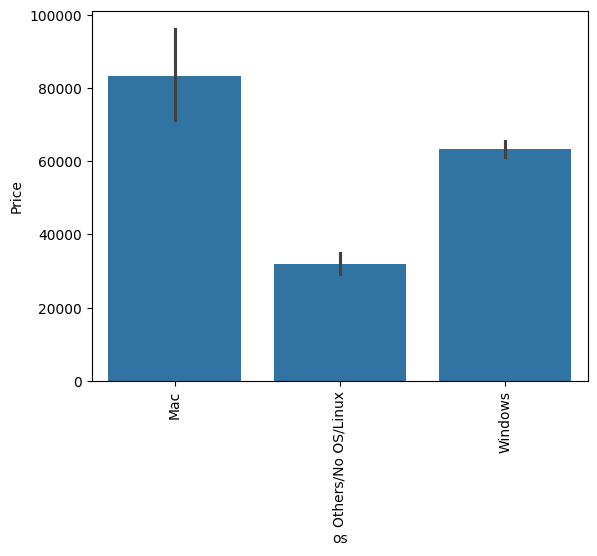

In [128]:
sns.barplot(x=data["os"],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

**Distribution of target column**

<Axes: xlabel='Price', ylabel='Density'>

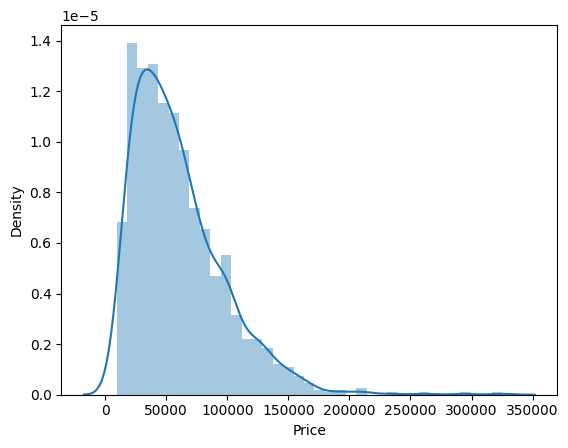

In [129]:
sns.distplot(data["Price"])

**Observation:**

we saw the distribution of the target variable above which was right-skewed.

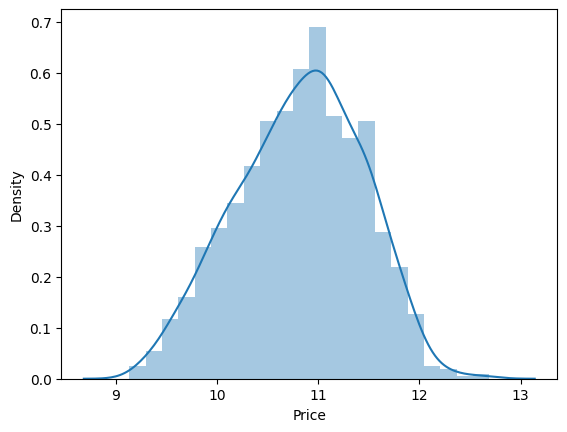

In [130]:
sns.distplot(np.log(data['Price']))
plt.show()

**Observation:**

 By transforming it to normal distribution performance of the algorithm will increase. we take the log of values that transform to the normal distribution which you can observe below. So while separating dependent and independent variables we will take a log of price, and in displaying the result perform exponent of it.

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1272 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             1272 non-null   object 
 1   TypeName            1272 non-null   object 
 2   Ram                 1272 non-null   int32  
 3   Weight              1272 non-null   float64
 4   Price               1272 non-null   float64
 5   Touchscreen         1272 non-null   int64  
 6   Ips                 1272 non-null   int64  
 7   PPI_pixal_pre_inch  1272 non-null   float64
 8   Cpu_brand           1272 non-null   object 
 9   HDD                 1272 non-null   int64  
 10  SSD                 1272 non-null   int64  
 11  Hybird              1272 non-null   int64  
 12  Falsh_storage       1272 non-null   int64  
 13  Gpu_Brand           1272 non-null   object 
 14  os                  1272 non-null   object 
dtypes: float64(3), int32(1), int64(6), object(5)
memory usage: 1

**Comparing the correlation of all numerical variable**

<Axes: >

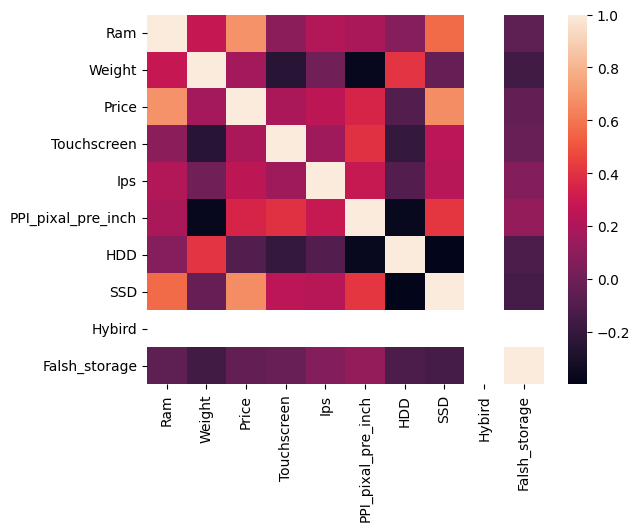

In [133]:
numerical_data = data.select_dtypes(include=['number'])
sns.heatmap(numerical_data.corr())

In [134]:
numerical_data.corr()['Price']

,Price
Ram,0.685521
Weight,0.175194
Price,1.000000
Touchscreen,0.190738
Ips,0.255987
PPI_pixal_pre_inch,0.345331
HDD,-0.095855
SSD,0.668271
Hybird,NaN
Falsh_storage,-0.037881


In [135]:
# droping weak columns
data.drop(columns=['Hybird','Falsh_storage'],inplace=True)

# **Data Preprocessing**

Encoding categorical variables

Splitting data into training and testing sets

Scaling features

# **One Hot Encoding of Categorical variable**

In [136]:
#Apply one-hot encoding
data=pd.get_dummies(data,columns=["Company","TypeName",'Cpu_brand','Gpu_Brand','os'],drop_first=True,dtype=np.int64)


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1272 entries, 0 to 1302
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ram                              1272 non-null   int32  
 1   Weight                           1272 non-null   float64
 2   Price                            1272 non-null   float64
 3   Touchscreen                      1272 non-null   int64  
 4   Ips                              1272 non-null   int64  
 5   PPI_pixal_pre_inch               1272 non-null   float64
 6   HDD                              1272 non-null   int64  
 7   SSD                              1272 non-null   int64  
 8   Company_Apple                    1272 non-null   int64  
 9   Company_Asus                     1272 non-null   int64  
 10  Company_Chuwi                    1272 non-null   int64  
 11  Company_Dell                     1272 non-null   int64  
 12  Company_Fujitsu          

**Seperating Independent and Dependent variable**

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# Split data into features and target variable
x= data.drop('Price', axis=1)
y = np.log(data['Price'])
x.head()

,Ram,Weight,Touchscreen,Ips,PPI_pixal_pre_inch,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,...,TypeName_Ultrabook,TypeName_Workstation,Cpu_brand_Intel Core i3,Cpu_brand_Intel Core i5,Cpu_brand_Intel Core i7,Cpu_brand_Other Intel Processor,Gpu_Brand_Intel,Gpu_Brand_Nvidia,os_Others/No OS/Linux,os_Windows
0,8,1.37,0,1,226.983005,0,128,1,0,0,...,1,0,0,1,0,0,1,0,0,0
1,8,1.34,0,0,127.677940,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0
2,8,1.86,0,0,141.211998,0,256,0,0,0,...,0,0,0,1,0,0,1,0,1,0
3,16,1.83,0,1,220.534624,0,512,1,0,0,...,1,0,0,0,1,0,0,0,0,0
4,8,1.37,0,1,226.983005,0,256,1,0,0,...,1,0,0,1,0,0,1,0,0,0


**Feature Scalling**

In [139]:
# Scale features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[-0.0838028 , -0.87709032, -0.41123916, ..., -0.6686546 ,
        -0.36701657, -2.52890269],
       [-0.0838028 , -0.91425664, -0.41123916, ..., -0.6686546 ,
        -0.36701657, -2.52890269],
       [-0.0838028 , -0.2700404 , -0.41123916, ..., -0.6686546 ,
         2.72467265, -2.52890269],
       ...,
       [-1.16235751, -0.71603626, -0.41123916, ..., -0.6686546 ,
        -0.36701657,  0.39542842],
       [-0.44332103,  0.13878913, -0.41123916, ..., -0.6686546 ,
        -0.36701657,  0.39542842],
       [-0.80283927,  0.15117791, -0.41123916, ..., -0.6686546 ,
        -0.36701657,  0.39542842]])

In [140]:
# splitting the dataset for training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [141]:
x_train.shape

(954, 38)

In [142]:
x_test.shape

(318, 38)

**Model Evulation**

Linear Regression - MAE: 0.2233837595859926, MSE: 0.0796635036873727, RMSE: 0.28224723858236894, R²: 0.7875417443319691


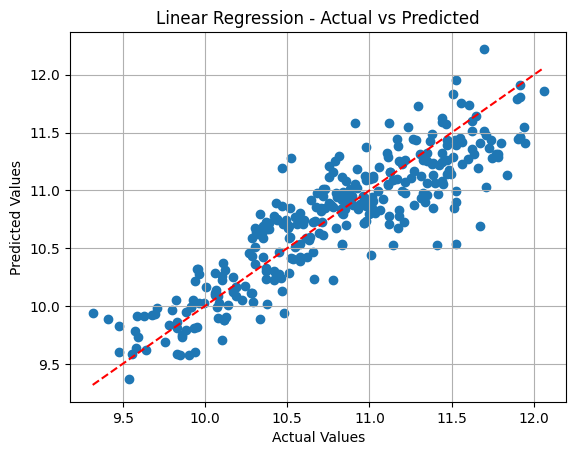

KNeighbors Regressor - MAE: 0.22845094406403293, MSE: 0.08982901975571077, RMSE: 0.29971489745374813, R²: 0.7604308627880184


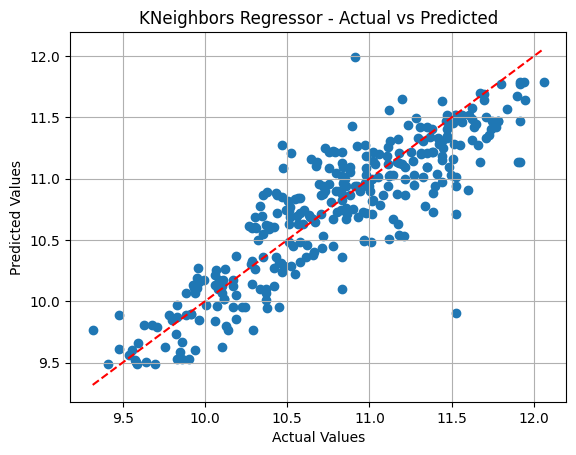

Random Forest - MAE: 0.16757900524320893, MSE: 0.04802175470917164, RMSE: 0.2191386654818625, R²: 0.871928577486784


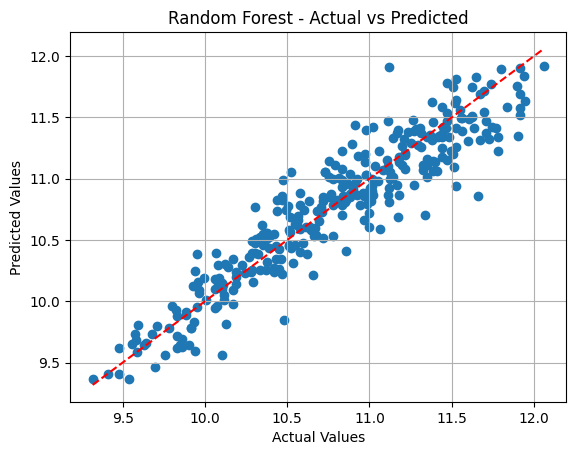

Gradient Boosting - MAE: 0.1771659864862112, MSE: 0.05091228542429362, RMSE: 0.22563750890375833, R²: 0.8642196884062874


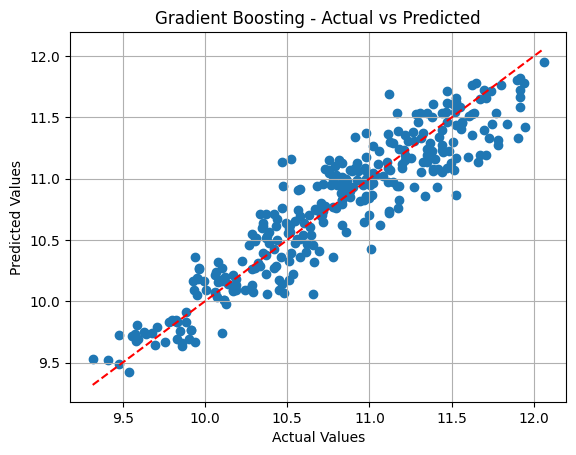

Decision Tree - MAE: 0.2159077546166782, MSE: 0.0848760854334534, RMSE: 0.2913350055064674, R²: 0.7736400707419476


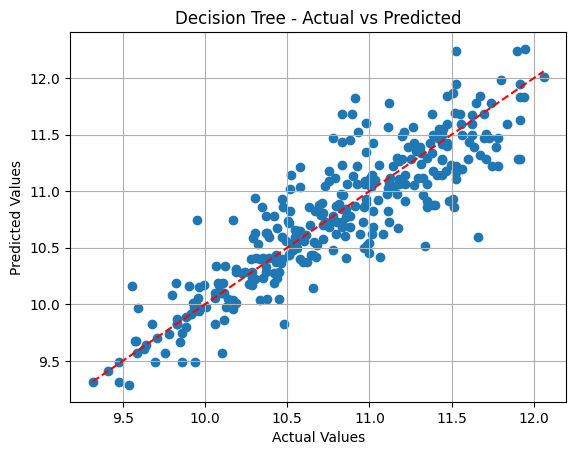

XGBoost - MAE: 0.16903153391490355, MSE: 0.04980942284379661, RMSE: 0.22318024743197282, R²: 0.8671609632592422


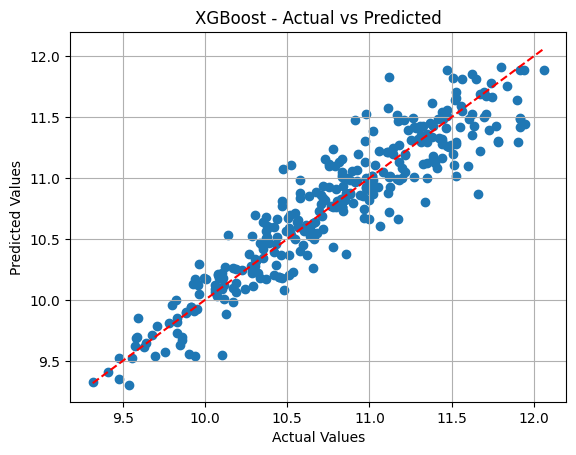

In [143]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
# importing cost function libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'KNeighbors Regressor': KNeighborsRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'XGBoost': XGBRegressor(),
}

# Train and evaluate models
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

# Model evaluation
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R²: {r2}")

# Scatter plot of actual vs. predicted values
    plt.scatter(y_test, y_pred)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of perfect prediction
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{name} - Actual vs Predicted')
    plt.grid(True)
    plt.show()

# **Hyperparameter Tuning**

In [144]:
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Define the Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(x_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(x_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("MSE:", mse)
print("R²:", r2)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
MSE: 0.04643616512183926
R²: 0.876157259158281


In [145]:
%%capture
pip install gradio


In [93]:
import joblib

# Assuming 'best_rf' is your trained Random Forest model
joblib.dump(best_model, 'laptop_price_model.pkl')


['laptop_price_model.pkl']

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1272 entries, 0 to 1302
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ram                              1272 non-null   int32  
 1   Weight                           1272 non-null   float64
 2   Price                            1272 non-null   float64
 3   Touchscreen                      1272 non-null   int64  
 4   Ips                              1272 non-null   int64  
 5   PPI_pixal_pre_inch               1272 non-null   float64
 6   HDD                              1272 non-null   int64  
 7   SSD                              1272 non-null   int64  
 8   Company_Apple                    1272 non-null   int64  
 9   Company_Asus                     1272 non-null   int64  
 10  Company_Chuwi                    1272 non-null   int64  
 11  Company_Dell                     1272 non-null   int64  
 12  Company_Fujitsu          

In [154]:
import gradio as gr
import joblib
import numpy as np
import pandas as pd

# Load the model and dataframe
df = pd.read_csv("/content/laptop.csv")
model = joblib.load('/content/laptop_price_model.pkl')

# (Assuming you have the original DataFrame before encoding)
print("Unique Companies in Original Data:", df.columns[df.columns.str.contains('Company_')])

# Print out column names for debugging
print("DataFrame Columns:", df.columns)

# Define mappings for categorical features
company_mapping = {
    "Apple": "Company_Apple",
    "Asus": "Company_Asus",
    "Chuwi": "Company_Chuwi",
    "Dell": "Company_Dell",
    "Fujitsu": "Company_Fujitsu",
    "Google": "Company_Google",
    "HP": "Company_HP",
    "Huawei": "Company_Huawei",
    "LG": "Company_LG",
    "Lenovo": "Company_Lenovo",
    "MSI": "Company_MSI",
    "Mediacom": "Company_Mediacom",
    "Microsoft": "Company_Microsoft",
    "Razer": "Company_Razer",
    "Samsung": "Company_Samsung",
    "Toshiba": "Company_Toshiba",
    "Vero": "Company_Vero",
    "Xiaomi": "Company_Xiaomi"
}

type_mapping = {
    "Gaming": "TypeName_Gaming",
    "Netbook": "TypeName_Netbook",
    "Notebook": "TypeName_Notebook",
    "Ultrabook": "TypeName_Ultrabook",
    "Workstation": "TypeName_Workstation"
}

cpu_mapping = {
    "Intel Core i3": "Cpu_brand_Intel Core i3",
    "Intel Core i5": "Cpu_brand_Intel Core i5",
    "Intel Core i7": "Cpu_brand_Intel Core i7",
    "Other Intel Processor": "Cpu_brand_Other Intel Processor"
}

gpu_mapping = {
    "Intel": "Gpu_Brand_Intel",
    "Nvidia": "Gpu_Brand_Nvidia"
}

os_mapping = {
    "Windows": "os_Windows",
    "Others/No OS/Linux": "os_Others/No OS/Linux"
}

# Define the prediction function
def predict_price(company, lap_type, ram, weight, touchscreen, ips, screen_size, resolution, cpu, hdd, ssd, gpu, os):
    touchscreen = 1 if touchscreen == "Yes" else 0
    ips = 1 if ips == "Yes" else 0
    X_res = int(resolution.split('x')[0])
    Y_res = int(resolution.split('x')[1])
    ppi = ((X_res ** 2) + (Y_res ** 2)) ** 0.5 / screen_size

    # Create a base query with zeros
    query = np.zeros(len(df.columns))

    # Map inputs to one-hot encoded columns
    query[df.columns.get_loc(company_mapping[company])] = 1
    query[df.columns.get_loc(type_mapping[lap_type])] = 1
    query[df.columns.get_loc(cpu_mapping[cpu])] = 1
    query[df.columns.get_loc(gpu_mapping[gpu])] = 1
    query[df.columns.get_loc(os_mapping[os])] = 1

    # Directly assign numerical and boolean features
    query[df.columns.get_loc("Ram")] = ram
    query[df.columns.get_loc("Weight")] = weight
    query[df.columns.get_loc("Touchscreen")] = touchscreen
    query[df.columns.get_loc("Ips")] = ips
    query[df.columns.get_loc("PPI_pixal_pre_inch")] = ppi
    query[df.columns.get_loc("HDD")] = hdd
    query[df.columns.get_loc("SSD")] = ssd

    # Convert the query into a DataFrame
    query_df = pd.DataFrame([query], columns=df.columns)

    # Make prediction
    prediction = int(np.exp(model.predict(query_df)[0]))
    return f"The predicted price of this configuration is ${prediction}"

# Gradio interface
interface = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Dropdown(list(company_mapping.keys()), label="Brand"),
        gr.Dropdown(list(type_mapping.keys()), label="Type"),
        gr.Dropdown([2, 4, 6, 8, 12, 16, 24, 32, 64], label="Ram (in GB)"),
        gr.Number(label="Weight of the Laptop"),
        gr.Dropdown(['No', 'Yes'], label="TouchScreen"),
        gr.Dropdown(['No', 'Yes'], label="IPS"),
        gr.Number(label="Screen Size"),
        gr.Dropdown(['1920x1080', '1366x768', '1600x900', '3840x2160', '3200x1800', '2880x1800', '2560x1600', '2560x1440', '2304x1440'], label="Screen Resolution"),
        gr.Dropdown(list(cpu_mapping.keys()), label="CPU"),
        gr.Dropdown([0, 128, 256, 512, 1024, 2048], label="HDD (in GB)"),
        gr.Dropdown([0, 8, 128, 256, 512, 1024], label="SSD (in GB)"),
        gr.Dropdown(list(gpu_mapping.keys()), label="GPU"),
        gr.Dropdown(list(os_mapping.keys()), label="OS")
    ],
    outputs="text",
    title="Laptop Price Predictor"
)

interface.launch()


Unique Companies in Original Data: Index([], dtype='object')
DataFrame Columns: Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price'],
      dtype='object')
Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://c05c0e8052f1aecd5d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# **Questions to Explore:**

Which features have the most significant impact on laptop prices?

In [ ]:
RAM: Correlation = 0.6855 (strong positive impact)
CPU brand (Intel Core i7): Correlation = 0.5562 (significant positive impact)
SSD: Correlation = 0.6683 (strong positive impact)
Laptop Type (Gaming): Correlation = 0.3763 (moderate positive impact)


**Can the model accurately predict the prices of laptops from lesser-known brands?**

In [ ]:
Lesser-known brands have weaker correlations,
e.g., Chuwi = -0.0563, Mediacom = -0.0882, leading to potential inaccuracies in price predictions.

**Does the brand of the laptop significantly influence its price?**

In [ ]:
Brand does influence price, but with lower correlation values
 (e.g., Apple = 0.0811, Asus = -0.0100).
 Hardware features like RAM (0.6855) and SSD (0.6683) have a stronger impact.

**How well does the model perform on laptops with high-end specifications compared to budget laptops?**

In [ ]:
High-end laptops (e.g., Intel Core i7, 0.5562) are predicted more accurately due to stronger feature correlations.
Budget laptops might have lower accuracy, as brands like Chuwi (-0.0563) and Asus (-0.0100) have weaker correlations.

**What are the limitations and challenges in predicting laptop prices accurately?**

In [ ]:
Lesser-known brands (weak correlations like Mediacom = -0.0882)
Variability in specifications (some brands and types have low correlation values)
New models might have unique features, leading to inaccurate predictions.
Difficulty predicting prices for new or unique models

**How does the model perform when predicting the prices of newly released laptops not present in the training dataset?**

In [ ]:
The model may struggle with newly released laptops not in the training data,
as they may have unique features or specifications that were not accounted for, leading to less reliable predictions